<h1>Linear Regression</h1>

<ul>
    <li><h4>Nama : Haikal Raditya Fadhilah</h4></li>
    <li><h4>NIM : 21.11.3910</h4></li>
    <li><h4>Kelas : Informatika 02</h4></li>
</ul>

In [66]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

<h2>Load Datasets</h2>

In [21]:
#Load Datatest From SkLearn
data_diabetes = load_diabetes(as_frame=True)

# Membuat Dataframe Menggunakan Pandas
df = pd.DataFrame(data_diabetes['frame'])

#Melihat 5 Data Teratas
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [24]:
print(data_diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<AxesSubplot:>

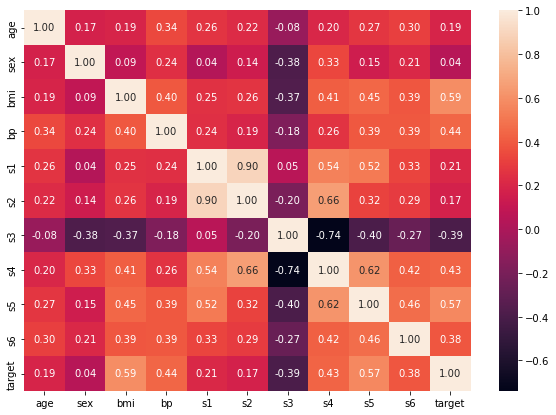

In [36]:
# Menampilkan Diagram Korelasi

plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

In [44]:
# Membuat Variable Baru Untuk Menampung Variabel Bebas
varBebas = ['bmi','bp','s3','s4','s5','s6']
X = df[varBebas]
y = df['target']

In [49]:
# MengSplit Dataset Menjadi 2 (Train Dan Test)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=100);

In [55]:
# Cek Data Train Dan Test
print(X_train.shape)
print(X_test.shape)

(331, 6)
(111, 6)


In [58]:
# Mencari Linear Regresi
regres = LinearRegression()
regres.fit(X_train,y_train)

LinearRegression()

In [64]:
# Mencari Nilai Coef Dan Intercept
print("Nilai Intercept :",regres.intercept_)
print("Nilai Coef :",regres.coef_)

Nilai Intercept : 153.09539612177645
Nilai Coef : [ 595.48306939  231.82784493 -280.11468133 -239.09566117  580.92486008
   34.06192559]


In [70]:
# Evaluasi Model Regresi
pred = regres.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test),pred))

In [72]:
# Nilai Evaluasi
rmse

53.52194202207376

In [73]:
# Mencari Rumus Persamaan regresi
# y = Semua Nilai Coef * Kolomnya